<h1> Homework </h1>

In [2]:
import pandas as pd
import numpy as np
import wget
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

AB_NYC_2019 = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'


df = pd.read_csv('AB_NYC_2019.csv')




In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h1> Baseline  </h1>


In [4]:
base = ['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']


In [5]:

null_columns=df[base].columns[df[base].isnull().any()]
df[null_columns].isnull().sum()

reviews_per_month    10052
dtype: int64

In [6]:
df[base]

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,9,0.21,6,365
1,40.75362,-73.98377,1,45,0.38,2,355
2,40.80902,-73.94190,3,0,NaN,1,365
3,40.68514,-73.95976,1,270,4.64,1,194
4,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,NaN,2,9
48891,40.70184,-73.93317,4,0,NaN,2,36
48892,40.81475,-73.94867,10,0,NaN,1,27
48893,40.75751,-73.99112,1,0,NaN,6,2


In [183]:
df_train.isnull().sum()

id                                   0
name                                 7
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       6146
reviews_per_month                 6146
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [10]:
def prepare_X_means(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

<h2> Linear Regression
</h2>


In [12]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [14]:
def rmse(y,y_pred):
    se = pow(y - y_pred, 2)
    mse = se.mean() # NUMPY mean method
    return np.sqrt(mse)

In [15]:
list_seeds=[]
for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    print("for seed",x)
    np.random.seed(x)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    print('validation:', rmse(y_val, y_pred))
    list_seeds.append(rmse(y_val, y_pred))
    X_test = prepare_X(df_test)
    y_pred = w_0 + X_test.dot(w)
    print('test:', rmse(y_test, y_pred))

list_seeds
print(" The STD for all seeds " ,round(np.std(list_seeds),3))

for seed 0
validation: 0.6549779961346657
test: 0.6304569982548498
for seed 1
validation: 0.6462523685627168
test: 0.6486723821113527
for seed 2
validation: 0.6476558176286166
test: 0.6409503260855544
for seed 3
validation: 0.6375145070186145
test: 0.6396698467894589
for seed 4
validation: 0.6445809083682932
test: 0.6555733449194385
for seed 5
validation: 0.6305809996187742
test: 0.6391858794354185
for seed 6
validation: 0.6297851917850126
test: 0.6473543640212285
for seed 7
validation: 0.6506184267094883
test: 0.6558892184286734
for seed 8
validation: 0.6489780353545126
test: 0.640513556859824
for seed 9
validation: 0.643756516828629
test: 0.6450366766812393
 The STD for all seeds  0.008


In [16]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [17]:
w_0, w = train_linear_regression(X_train, y_train)


In [18]:
y_pred = w_0 + X_train.dot(w)


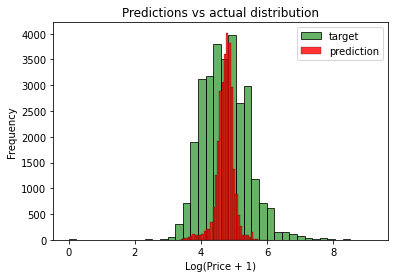

In [19]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [21]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', round(rmse(y_val, y_pred),2))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', round(rmse(y_test, y_pred),2))

validation: 0.64
test: 0.65


In [218]:
rmse(y_val, y_pred)


0.643756516828629

In [25]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))


     0 0.643756516828629
 1e-06 0.6437562387633923
0.0001 0.6437347928105802
 0.001 0.6439824310232958
  0.01 0.6546902699099876
   0.1 0.6759833393314361
     1 0.6809754401217905
     5 0.6814733712695191
    10 0.6815422198914772
